In [75]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot

# Carregamento da base de dados
base = pd.read_csv('../Data/VALE3.SA.csv', sep = ',')

In [52]:
# Visualização da base de dados
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,79.000000,79.970001,78.000000,78.000000,69.639420,18557200
1,2022-01-04,78.510002,79.070000,76.900002,77.080002,68.818031,18178700
2,2022-01-05,77.370003,78.680000,77.129997,77.809998,69.469780,22039000
3,2022-01-06,78.639999,80.349998,78.309998,79.379997,70.871506,22044100
4,2022-01-07,80.400002,84.000000,79.790001,84.000000,74.996292,35213100


In [53]:
# Criando variáveis X e Y
X = base.iloc[:, 1].values
Y = base.iloc[:, 4].values

<Axes: >

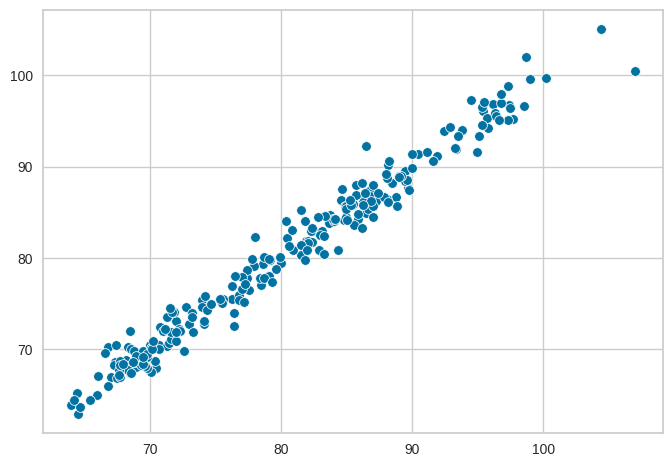

In [54]:
# Criando o gráfico de dispersão
sns.scatterplot(data=base, x=X, y=Y)

In [55]:
# Cálculo da Correlação(R) entre X e Y
# O primeiro e o ultimo valor são os valores de correlação do X e Y para ele mesmo
# O segundo valor e o terceiro valor é a correlação entre X e Y
correlacao = np.corrcoef(X, Y)
correlacao

array([[1.        , 0.98775566],
       [0.98775566, 1.        ]])

In [56]:
# O reshape(-1, 1) transforma o vetor em matriz
X = X.reshape(-1, 1)

# Criação do modelo
modelo = LinearRegression()

# Treinamento do modelo
modelo.fit(X, Y)

LinearRegression()

In [72]:
# Previsão de novos valores
previsao = modelo.predict([[69.40]])
previsao

array([69.61309346])

# Verificar se é um bom modelo!

In [59]:
# O valor de R² é o valor de correlação ao quadrado.
# O quanto o modelo consegue explicar os dados(0 a 100%)
modelo.score(X, Y)

0.975661248153673

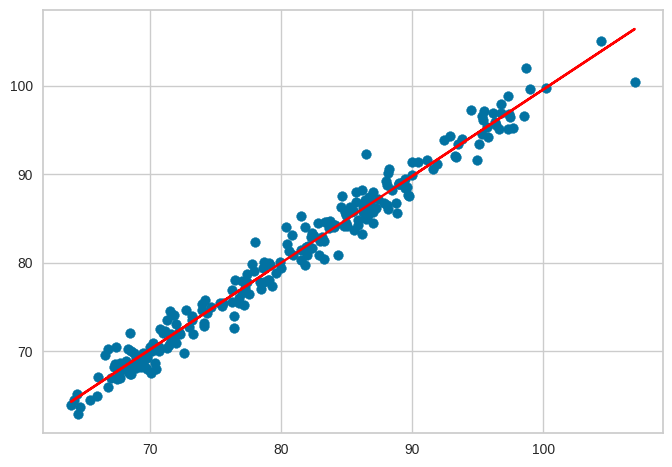

In [76]:
# Geração do gráfico com os pontos reais e as previsões(reta)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

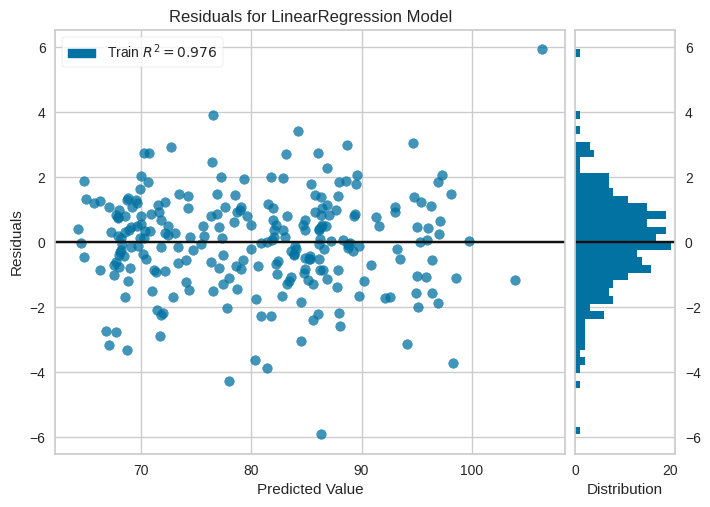

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [61]:
# Gráfico para visualizar os residuais
# Retorna o valor residual de cada ponto
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, Y)
visualizador.poof()